In [11]:
import os, sys

codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd

from plotting import plot_utils
from model_fitting import initialize_fitting 
from utils import numpy_utils, default_paths, prf_utils
from analyze_features import analyze_feature_decoding


In [12]:
# Load everything

# subject=998;
subject=999; # 999 is our independent set of 10,000 COCO images
feature_type='gabor_solo'
which_prf_grid=5

path_to_load = default_paths.gabor_texture_feat_path
path_to_load = os.path.join(path_to_load, 'feature_decoding')
    
fn1 = os.path.join(path_to_load, 'S%d_%s_LDA_all_grid%d.npy'%(subject, feature_type, which_prf_grid))
decoding = np.load(fn1,allow_pickle=True).item()
    
names = decoding['discrim_type_list']
acc = decoding['acc']
dprime = decoding['dprime']

n_axes = len(names)
prfs_use = prf_utils.get_prfs_use_decoding()

In [16]:
acc.shape

(1456, 6)

In [13]:
decoding.keys()

dict_keys(['acc', 'dprime', 'discrim_type_list', 'n_trials_eachlabel'])

In [14]:
assert(which_prf_grid==5)
models = prf_utils.get_prf_models(which_grid=which_prf_grid)
n_prfs = len(models)

x = models[:,0]*8.4; y = models[:,1]*8.4;
ecc = np.round(np.sqrt(models[:,0]**2+models[:,1]**2)*8.4, 4)
sizes = np.round(models[:,2]*8.4, 4)
angles = np.round(np.mod(np.arctan2(y,x)*180/np.pi, 360),1)

ecc_vals = np.unique(ecc)
size_vals = np.unique(sizes)
n_ecc = len(ecc_vals);
n_sizes = len(size_vals)
n_angles = len(np.unique(angles))

counts_each_ecc = np.array([np.sum(ecc==ecc_vals[ee]) for ee in range(n_ecc)])
ecc_use = counts_each_ecc==(n_angles*n_sizes)
n_ecc_use = np.sum(ecc_use)
ecc_vals_use = ecc_vals[ecc_use]

Text(0, 0.5, 'decoding acc')

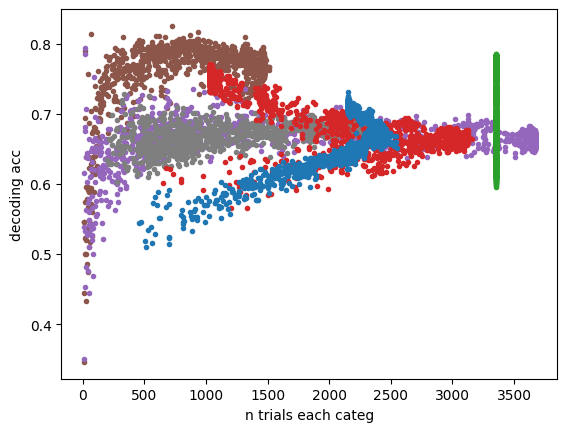

In [18]:
plt.figure()
colors = cm.tab20(np.linspace(0,1,20))[[10,8,14,6,0,4],:]

n_trials = decoding['n_trials_eachlabel']
# colors = cm.tab10(np.linspace(0,1,10))[[4,5, 3, 9,2],:]

prfs_plot = sizes>0
# prfs_plot = sizes>size_vals[5]

for ai in range(n_axes):

    plt.plot(n_trials[prfs_plot,ai], acc[prfs_plot,ai],'.',color=colors[ai,:])
    
plt.xlabel('n trials each categ')
plt.ylabel('decoding acc')

<BarContainer object of 6 artists>

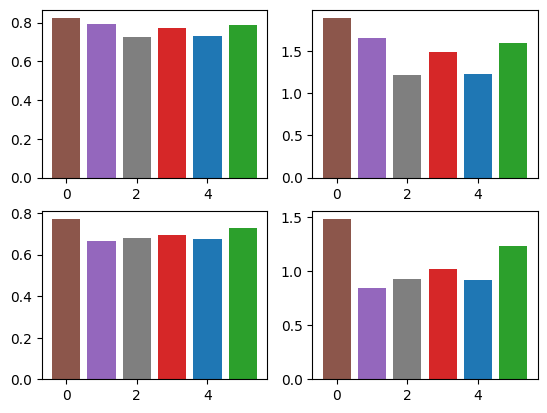

In [19]:
max_accs = np.max(acc, axis=0)
max_dprime = np.max(dprime, axis=0)
med_accs = np.median(acc, axis=0)
med_dprime = np.median(dprime, axis=0)
plt.figure()
plt.subplot(2,2,1)
plt.bar(np.arange(n_axes),max_accs, color=colors)
plt.subplot(2,2,2)
plt.bar(np.arange(n_axes),max_dprime, color=colors)
plt.subplot(2,2,3)
plt.bar(np.arange(n_axes),med_accs, color=colors)
plt.subplot(2,2,4)
plt.bar(np.arange(n_axes),med_dprime, color=colors)

In [7]:
np.max(acc[prfs_use,:], axis=0)

array([0.68527466, 0.69732034, 0.7804233 , 0.7221289 , 0.789122  ],
      dtype=float32)

In [7]:
prfs_use = np.isin(ecc,ecc_vals_use)
np.sum(prfs_use)

1280

#### plot dprime as a function of pRF params
Note trial counts are NOT matched here, so some of these differences can be related to counts

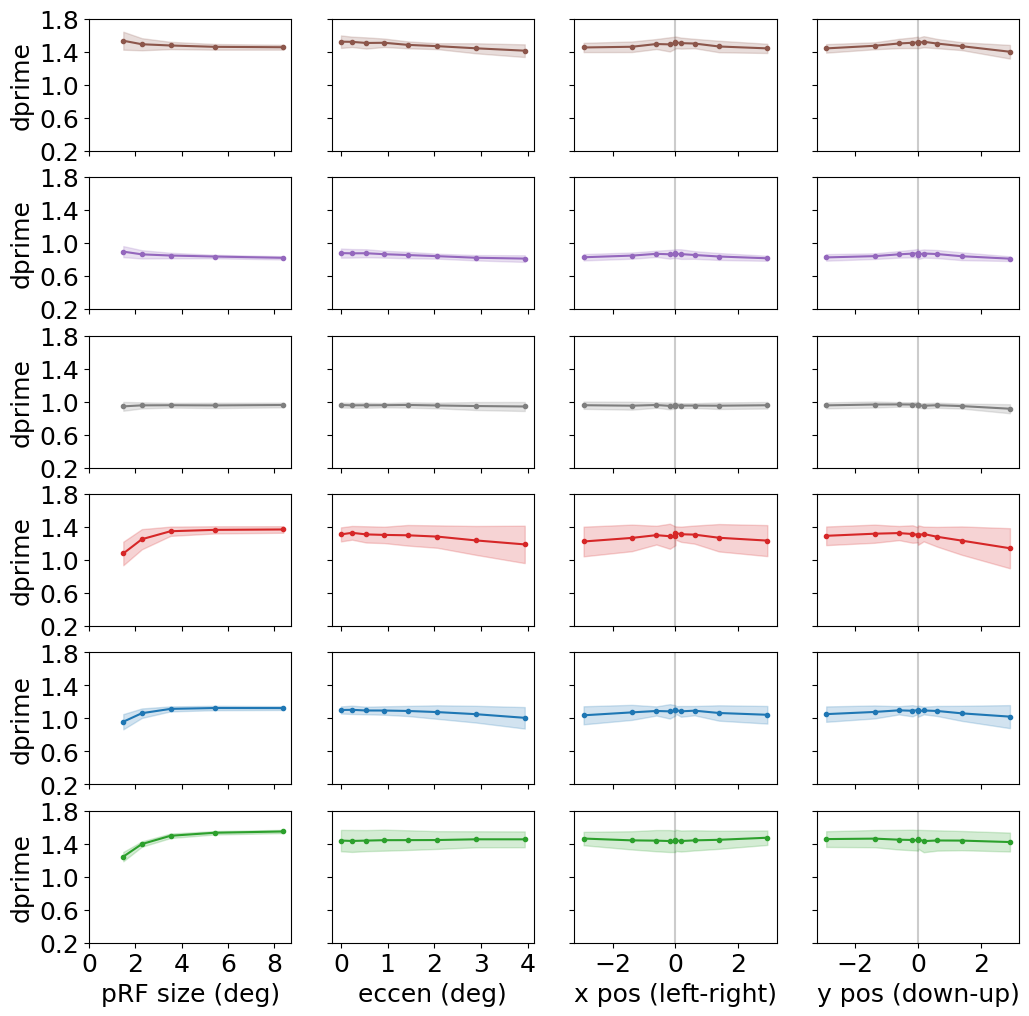

In [21]:
plt.figure(figsize=(12,12));
plot_utils.set_all_font_sizes(12)
plt.rcParams['pdf.fonttype']=42

colors = cm.tab20(np.linspace(0,1,20))[[10,8,14,6,0,4],:]

# colors = cm.tab10(np.linspace(0,1,10))[[4,5, 3, 9,2],:]

# n_bins = 10;
# linear_bins=False
n_bins=10
linear_bins=False

# ylims = [0, 1.6];
# yticks = [0.4, 0.8, 1.2, 1.6]
ylims = [0.2, 1.8];
yticks = [0.2, 0.6, 1.0, 1.4, 1.8]

xticks = [[0,2,4,6,8], [0,1,2,3,4], [-2, 0, 2], [-2, 0, 2]]

plot_utils.set_all_font_sizes(18)
pi=0;

for ai in range(n_axes):
    
    name = names[ai]
    vals = dprime[prfs_use,ai]
    
    pi+=1
    plt.subplot(n_axes,4,pi)
    
    x_vals = sizes[prfs_use]

    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ai,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    if ai==5:
        plt.xlabel('pRF size (deg)')
        plt.xticks(xticks[0])
    else:
        plt.xticks(xticks[0], labels=[])
    plt.ylabel('dprime')
    plt.ylim(ylims)
    plt.yticks(yticks)
    
    pi+=1
    plt.subplot(n_axes,4,pi)
    
    x_vals = ecc[prfs_use]

    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ai,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    if ai==5:
        plt.xlabel('eccen (deg)')
        plt.xticks(xticks[1])
    else:
        plt.xticks(xticks[1], labels=[])
    plt.ylim(ylims)
    plt.yticks(yticks,labels=[])

    pi+=1
    plt.subplot(n_axes,4,pi)
    
    x_vals = x[prfs_use]

    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True)    
    plt.plot(xbinned, ybinned, '.-', color=colors[ai,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    if ai==5:
        plt.xlabel('x pos (left-right)')
        plt.xticks(xticks[2])
    else:
        plt.xticks(xticks[2], labels=[])
    # plt.ylabel('dprime')
    plt.ylim(ylims)
    plt.yticks(yticks,labels=[])
    plt.axvline(0, color=[0.8, 0.8, 0.8])
    
    pi+=1
    plt.subplot(n_axes,4,pi)
    
    x_vals = y[prfs_use]

    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ai,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    if ai==5:
        plt.xlabel('y pos (down-up)')
        plt.xticks(xticks[3])
    else:
        plt.xticks(xticks[3], labels=[])
    plt.ylim(ylims)
    plt.yticks(yticks,labels=[])
    plt.axvline(0, color=[0.8, 0.8, 0.8])
    